# Comprehensive Exploration and Modeling: Unveiling Patterns in Diabetes Data

In this data analysis project, I began by loading the "diabetes-2.csv" dataset into a Pandas DataFrame, conducting an initial exploration that included checking dimensions, generating summary statistics, and displaying column information. Subsequently, I performed univariate analyses on the 'Age' and 'BMI' columns, visualizing their distributions and calculating additional statistics. Bivariate analysis explored the correlation between 'Age' and 'Pregnancies.' A data quality check revealed no missing values but identified and addressed zeros in specific columns. Feature selection was carried out, and the data was split into training and testing sets. A Support Vector Machine (SVM) model was created, with hyperparameter tuning performed using GridSearchCV. The model's performance was thoroughly evaluated, indicating a potential tradeoff between bias and variance, suggesting overfitting. Recommendations were made for further improvements, emphasizing the need for feature selection, engineering, and additional data collection to enhance the model's suitability for medical applications. The project provides a comprehensive overview of the dataset, analyses, and model development, highlighting areas for refinement in the context of predicting diabetes outcomes.

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

I loaded the "diabetes-2.csv" dataset into a Pandas DataFrame, checking its dimensions and generating summary statistics. The code also displayed information about column data types and non-null values. Finally, the first 50 rows of the dataset were shown for a brief overview. This process serves as an initial step in exploring and understanding the dataset.

In [2]:
# Load the dataset
diabetes_df = pd.read_csv("diabetes-2.csv")

# Display the dimensions 
dimensions = diabetes_df.shape
print("Dimensions for the data are as follows:", dimensions)

# Display statistics
statistics_summary = diabetes_df.describe()
print("\nSummary Statistics are as follows:")
print(statistics_summary)

info_column = diabetes_df.info()
diabetes_df.head(50)

Dimensions for the data are as follows: (768, 9)

Summary Statistics are as follows:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 2.1 Univariate Analysis for Age
In this analysis, I examined the "Age" column of the diabetes dataset. The histogram visually illustrates the age distribution, highlighting a right-skewed pattern. The mean age is around 33.24, with 22 being the mode and occurring 72 times. he skewness, indicating the distribution's asymmetry, was calculated at 1.13, suggesting a right-skewed pattern. This skewness indicates a concentration of younger ages with a tail extending towards older ages.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


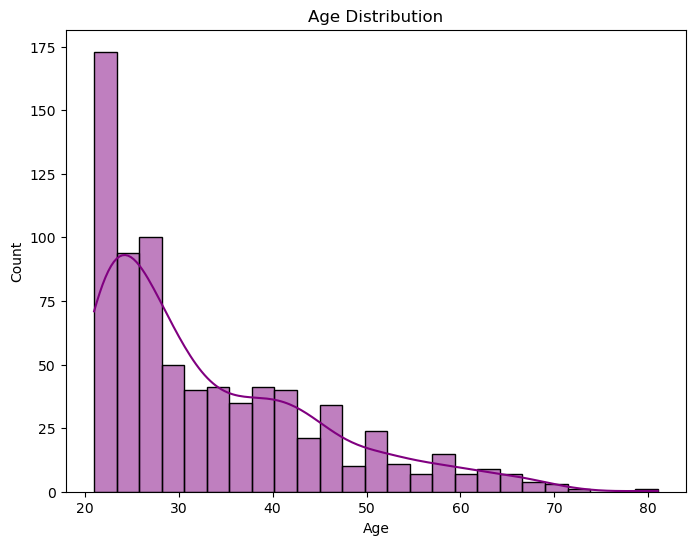


Additional info about the age column is as follows:
Mean Age: 33.24
Mode Age: 22 (Count: 72)
Skewness of Age: 1.13
column has a right-skew.


In [3]:
# Univariate Analysis for Age
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_df['Age'], bins=25, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# extra information for Age
age_mean = diabetes_df['Age'].mean().round(2)
age_mode = diabetes_df['Age'].mode().values[0].round(2)
age_mode_count = diabetes_df['Age'].value_counts().max()  
age_skewness = diabetes_df['Age'].skew().round(2)

print("\nAdditional info about the age column is as follows:")
print(f"Mean Age: {age_mean}")
print(f"Mode Age: {age_mode} (Count: {age_mode_count})")

print(f"Skewness of Age: {age_skewness}")

# Finding the skew pattern
if age_skewness > 0:
    print("column has a right-skew.")
elif age_skewness < 0:
    print("column has a left-skew.")
else:
    print("column is symmetric.")


### 2.2 Univariate Analysis for BMI

In the histogram, I observed a right-skewed distribution for the 'BMI' column, noticeable by the extended tail on the right side. The mean BMI is 32.46, and the mode is 32.0, occurring 13 times. The positive skewness (0.60) indicates a scarcity of very high BMI values. This suggests a predominant presence of lower to moderate BMI values, emphasizing the importance of investigating individuals with higher BMI values.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


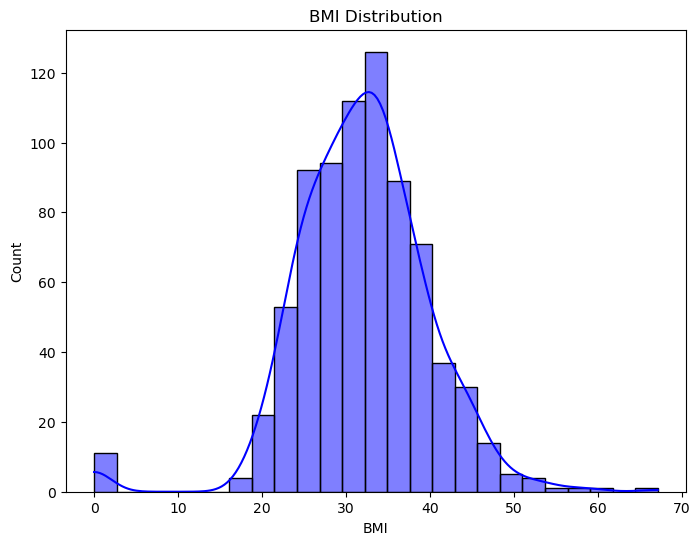


Additional info about the BMI column is as follows:
BMI Mean: 31.99
BMI Mode: 32.0 (Count: 13)
Skewness of BMI: -0.43
column has a left-skew.


In [4]:
# Univariate Analysis for BMI
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_df['BMI'], bins=25, kde=True, color='blue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# extra information for BMI
bmi_mean = diabetes_df['BMI'].mean().round(2)
bmi_mode = diabetes_df['BMI'].mode().values[0].round(2)
bmi_mode_count = diabetes_df['BMI'].value_counts().max()
bmi_skewness = diabetes_df['BMI'].skew().round(2)

print("\nAdditional info about the BMI column is as follows:")
print(f"BMI Mean: {bmi_mean}")
print(f"BMI Mode: {bmi_mode} (Count: {bmi_mode_count})")

print(f"Skewness of BMI: {bmi_skewness}")

# Finding the skew pattern
if bmi_skewness > 0:
    print("column has a right-skew.")
elif bmi_skewness < 0:
    print("column has a left-skew.")
else:
    print("column is symmetric.")

### 2.3 Correlation between Age and Pregnancies

In this analysis, I created a scatter plot to visually explore the relationship between 'Age' and 'Pregnancies' in the diabetes dataset. The scatter plot reveals the distribution of data points and any potential patterns in the correlation between the two variables. I calculated the Pearson Correlation coefficient, and its associated p-value is 1.82e-52, indicating a statistically significant correlation. The correlation coefficient of approximately 0.51 suggests a moderate positive correlation. I interpret this as a tendency for an increase in the number of pregnancies with advancing age. Therefore, I conclude that, in this dataset, I observed a moderate positive correlation between age and pregnancies.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


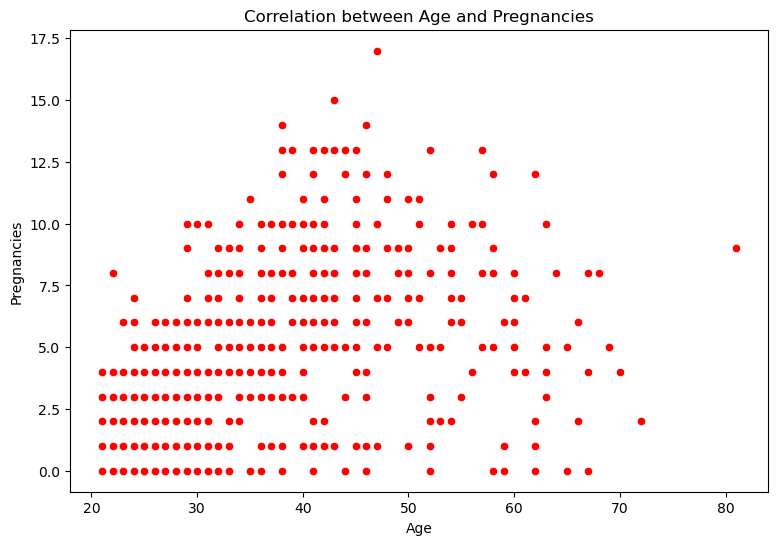


More info about the Relationship between Age and Pregnancies:
Correlation between Age and Pregnancies: 0.5443412284023387
P-value: 1.8628128328639617e-60
The correlation strength is positive correlation.
The correlation tends to be moderate.


In [5]:
# correlation between Age and Pregnancies
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Age', y='Pregnancies', data=diabetes_df, color='red')
plt.title('Correlation between Age and Pregnancies')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()

# Calculating the Pearson Correlation coefficient
correlation, p_value = pearsonr(diabetes_df['Age'], diabetes_df['Pregnancies'])

print("\nMore info about the Relationship between Age and Pregnancies:")
print(f"Correlation between Age and Pregnancies: {correlation}")
print(f"P-value: {p_value}")

# Finding the correlation strength
if correlation > 0:
    strength = "positive correlation"
elif correlation < 0:
    strength = "negative correlation"
else:
    strength = "no correlation"

print(f"The correlation strength is {strength}.")

# More analysis 
if abs(correlation) >= 0.7:
    print("The correlation is quite strong.")
elif 0.5 <= abs(correlation) < 0.7:
    print("The correlation tends to be moderate.")
else:
    print("The correlation is pretty weak.")




/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

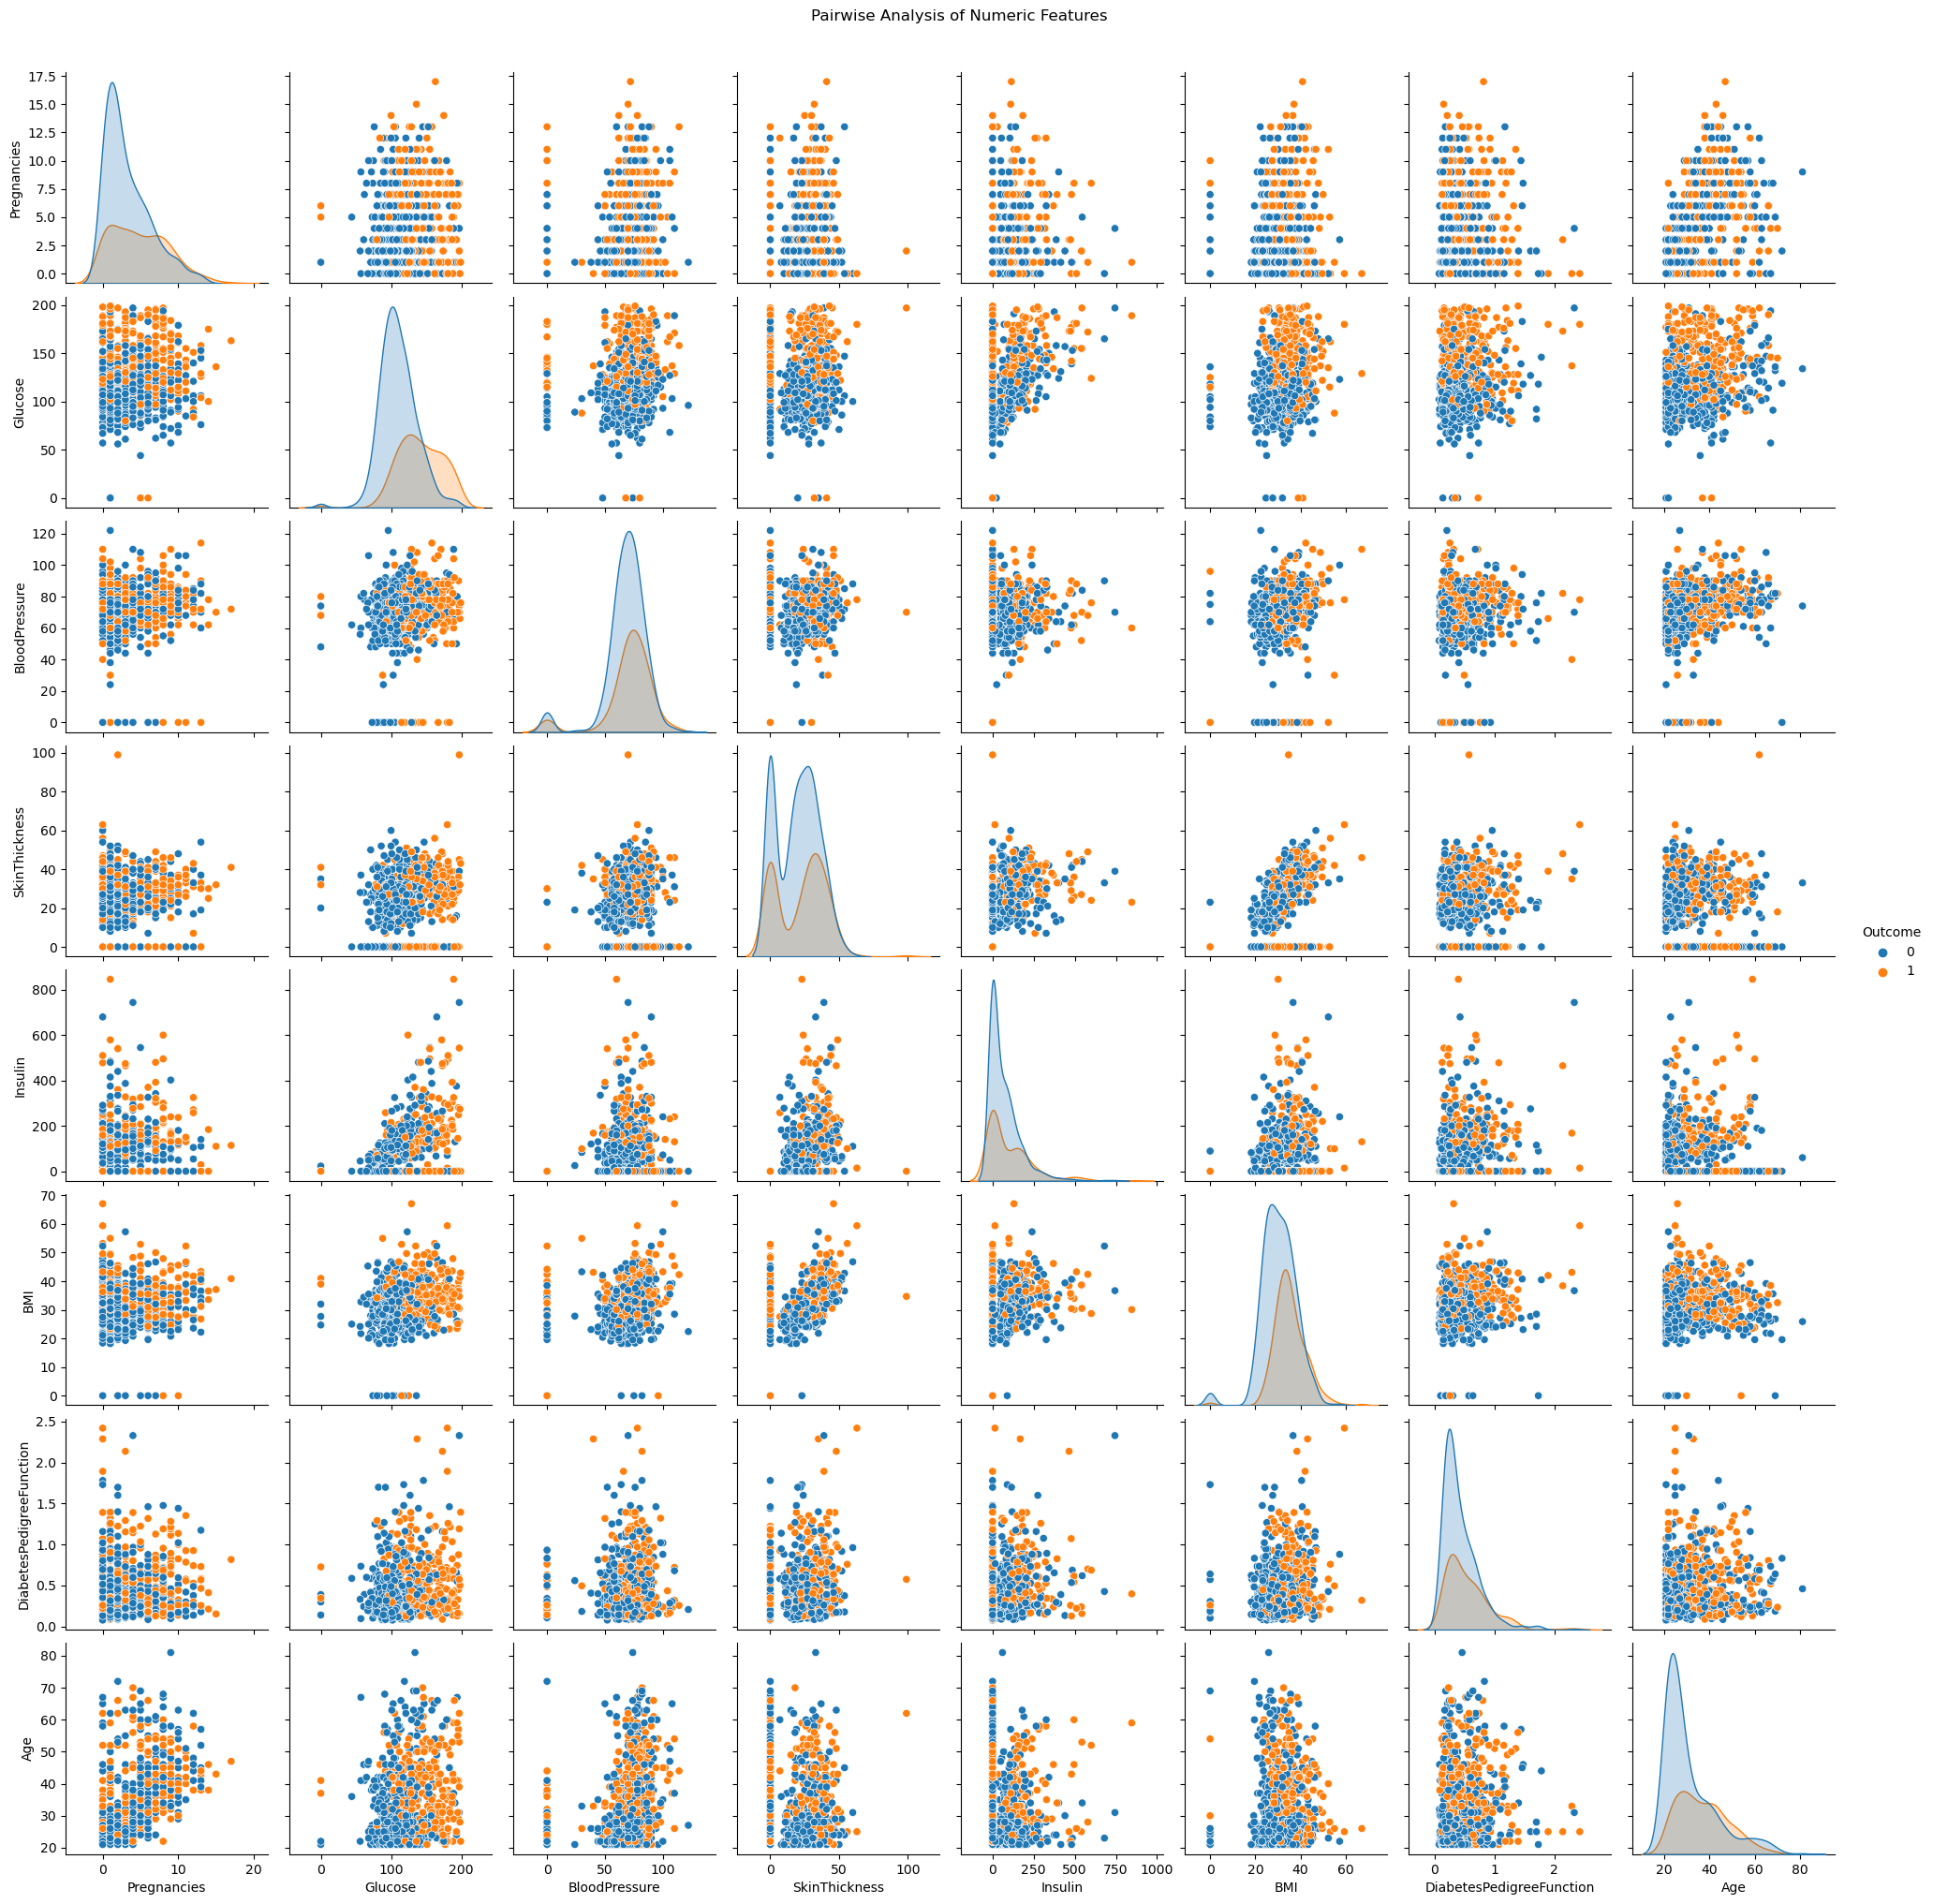

In [6]:
# constructing a pairplot
sns.pairplot(diabetes_df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairwise Analysis of Numeric Features', y=1.02)
plt.show()

### 3.1 Missing and Invalid Values
I performed a data quality check on the diabetes dataset. I first examined the dataset for missing values using the isnull() function, and the results indicated that there are no missing values in any of the columns.

Next, I investigated the presence of invalid values, specifically zeros, using the condition (diabetes_df == 0). The sum() function then calculated the number of zeros in each column. This analysis revealed the count of zero values for each feature. For instance, it highlighted that the 'Insulin' and 'SkinThickness' columns have a considerable number of zero values. Identifying and addressing these zeros is crucial in data preprocessing, as they may indicate missing or implausible data entries.

In [7]:
# CHecking for missing or invalid values
values_missing = diabetes_df.isnull().sum()
values_invalid = (diabetes_df == 0).sum()

print("Missing Values are as follows:")
print(values_missing)

print("\nInvalid Values (Number of zeros):")
print(values_invalid)


Missing Values are as follows:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Invalid Values (Number of zeros):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


### 3.2 Adressing Missing and Invalid Values
I addressed the issue of zeros in specific columns of the diabetes dataset. First, I identified the columns with zeros, including 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI'.

Next, I replaced the zero values in these columns with the mean values of the non-zero entries for each respective column. This helps to handle invalid data points and ensures a more accurate representation of the dataset.

After replacing the zeros, I printed the first few rows of the dataset to show the changes. Additionally, I counted the number of zeros in each column to confirm that the replacement was successful. The subsequent step involved providing a summary of the dataset after handling missing and invalid values, displaying key statistical measures for each column.

In [8]:
# columns that have zeros
zero_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replacing zeros with mean values
for column in zero_columns:
    mean_value = diabetes_df[column][diabetes_df[column] != 0].mean().round(2)
    diabetes_df[column] = diabetes_df[column].replace(0, mean_value).round(2)

# Displaying columns after replacement with the mean values
print("\nColumns After Replacing Zeros with Mean are as follows:")
print(diabetes_df.head())

# Number of zeros in column after replacing the rows
after_replacement_zero = (diabetes_df[zero_columns] == 0).sum()
print("\nNumber of Zeros in Each Column After Replacing Zeros with Mean:")
print(after_replacement_zero)

# Make sure that missing or invalid values are taken care of
print("\nAfter Handling Missing and Invalid Values it looks like:")
print(diabetes_df.describe().round(2))

# Save the new dataset
diabetes_df.to_csv("cleaned_diabetes.csv", index=False)


Columns After Replacing Zeros with Mean are as follows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         6.00    148.0           72.0          35.00   155.55  33.6   
1         1.00     85.0           66.0          29.00   155.55  26.6   
2         8.00    183.0           64.0          29.15   155.55  23.3   
3         1.00     89.0           66.0          23.00    94.00  28.1   
4         4.49    137.0           40.0          35.00   168.00  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Number of Zeros in Each Column After Replacing Zeros with Mean:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

After Handling Missing and Invalid Values it looks li

### 4.1 Constructing a Correlation Matrix
I loaded the "diabetes-2.csv" dataset into a Pandas DataFrame, checking its dimensions and generating summary statistics. The code also displayed information about column data types and non-null values. Finally, the first 50 rows of the dataset were shown for a brief overview. This process serves as an initial step in exploring and understanding the dataset.

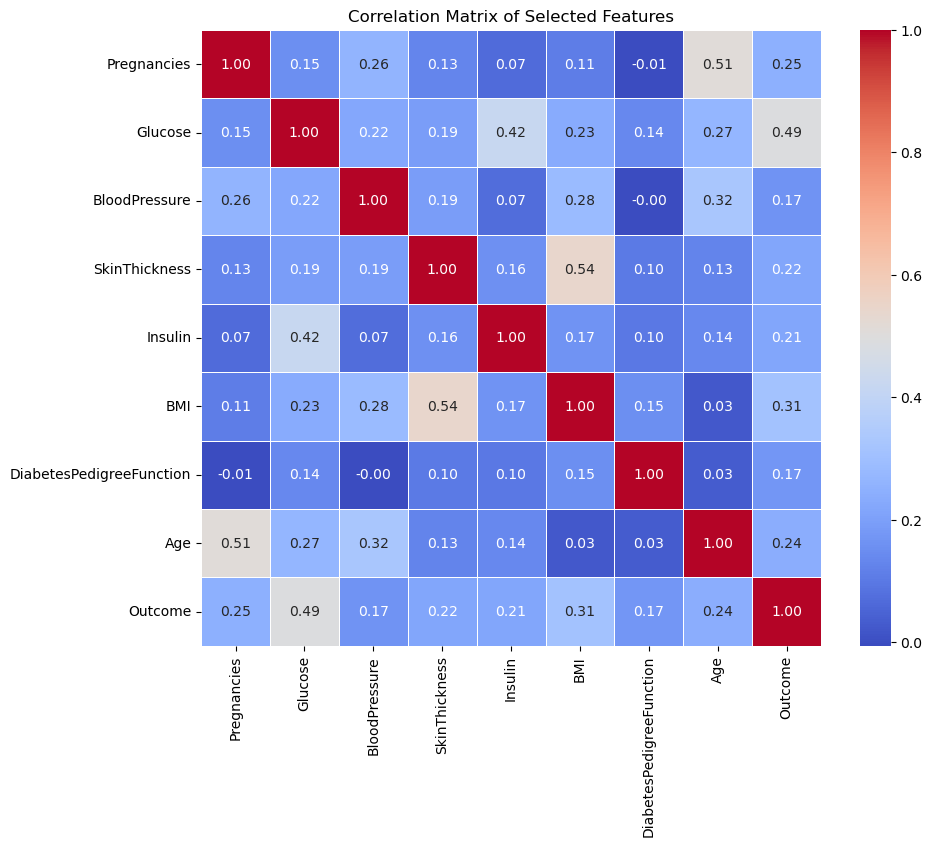

In [9]:
# Selecting the specified features
selected_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Subset the DataFrame with selected features
selected_data = diabetes_df[selected_features]

# Construct a correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

### 4.2 Selecting Features, Splitting Data
I selected the features 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age' because I believe they are important indicators for predicting the 'Outcome' variable, which represents the likelihood of diabetes. These features encompass key aspects such as glucose levels, blood pressure, and body mass index (BMI), which are known factors associated with diabetes. By including these specific features, I aim to capture the relevant information that contributes to the prediction of diabetes, making the model more informed and potentially more accurate in its predictions.

In [10]:
from sklearn.model_selection import train_test_split

# Selecting the features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = diabetes_df[features]
y = diabetes_df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Printing the dimensions
print(f"Training set dimensions are as follows: {X_train.shape}")
print(f"Testing set dimensions are as follows: {X_test.shape}")


Training set dimensions are as follows: (614, 8)
Testing set dimensions are as follows: (154, 8)


### 4.3 Utilizing StandardScaler 
I employed the StandardScaler from scikit-learn to normalize the training data for a diabetes prediction model. By normalizing features like 'Pregnancies', 'Glucose', and others, I ensured that all features share a common scale. This is crucial for models like support vector machines (SVMs), where variations in feature magnitudes can impact performance. The rounding operation to two decimal places was applied to enhance the clarity of the normalized data, now showcasing a mean of 0 and a standard deviation of 1 for each feature. This preprocessing step, which I performed, is a fundamental practice in machine learning to improve model accuracy and performance.

In [11]:
scaler = StandardScaler()
scaler.fit(X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.transform(X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]).round(2) #scale the training data

# Displaying the normalized data
print("Normalized Training Data:")
print(X_train.head())


Normalized Training Data:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60         -0.82    -1.26           0.01           0.05     0.01  0.02   
618         1.57    -0.33           0.81          -0.57     0.01 -0.60   
346        -1.17     0.57          -2.17          -1.16    -0.83 -0.53   
294         0.03     1.30          -1.84           0.05     0.01 -1.51   
231         0.55     0.40           0.64           0.98     2.48  2.00   

     DiabetesPedigreeFunction   Age  
60                      -0.49 -1.04  
618                      2.42  1.49  
346                      0.55 -0.95  
294                     -0.64  2.79  
231                     -0.69  1.14  


### 5.1
I created and evaluated a Support Vector Machine (SVM) model for predicting diabetes outcomes. The SVM was configured to handle imbalanced classes and ensure reproducibility. After training on the provided data, I applied the model to the scaled test set, computed its accuracy, and generated a detailed classification report. This thorough evaluation provides insights into the model's precision, recall, and F1-score metrics for both classes, crucial for assessing its utility in the medical industry.

In [12]:
# Initialize the SVC model
svm = SVC(class_weight='balanced', random_state=42, probability = True)

# Train the model
svm.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [13]:
#encode & scale the new/test data
X_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.transform(X_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Predict the labels for the test set
y_pred = svm.predict(X_test)

print('The predicted Outcome is: {}'.format(y_pred))

The predicted Outcome is: [1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0
 1 1 0 1 0 0]


In [14]:
# Evaluate the prediction accuracy
accuracy = svm.score(X_test, y_test).round(2)
print('The accuracy of the model is: {}'.format(accuracy))


The accuracy of the model is: 0.73


In [15]:
# displaying classification report
target_names = ['No Diabetes', 'Diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 No Diabetes       0.86      0.70      0.77        99
    Diabetes       0.59      0.80      0.68        55

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.73      0.74       154



### 5.2  
I conducted hyperparameter tuning for the Support Vector Classification (SVC) model using GridSearchCV. I specified a grid of hyperparameters ('C' and 'gamma') and utilized cross-validation with five folds to assess the model's performance. The outcome includes the best model, identified by the highest accuracy, along with the corresponding hyperparameters. This optimization is crucial as it enhances the model's capability to generalize well to new data. The reported best score, an accuracy of 76%, signifies the proportion of correctly predicted outcomes and serves as a key metric for evaluating the model's efficacy. Furthermore, I applied the tuned model to predict probabilities on the test set, using a threshold of 0.7 for classification. 

In [16]:
# Defining hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
}

# Performing GridSearchCV with the utilization of cross-validation
grid_search_cv = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_cv.fit(X_train, y_train)

# Display the best model/parameters and the best score
best_svm_model = grid_search_cv.best_estimator_
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_.round(2)

print("Best Model/Parameters:")
print(best_svm_model)
print("\nBest Parameters:")
print(best_params)
print("\nBest Score:")
print(best_score)

y_pred_prob_tuned = grid_search_cv.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_prob_tuned > 0.7).astype(int)  


Best Model/Parameters:
SVC(C=1, class_weight='balanced', gamma=0.01, probability=True, random_state=42)

Best Parameters:
{'C': 1, 'gamma': 0.01}

Best Score:
0.76


I conducted a comprehensive evaluation of the Support Vector Classification (SVC) model's performance using GridSearchCV. I started by displaying the best parameters and the corresponding best score obtained during hyperparameter tuning. Subsequently, I assessed the model's accuracy on both the training and test sets. The training set accuracy of 77% indicates the proportion of correctly predicted outcomes within the training data, while the test set accuracy of 73% reflects the model's generalization to new, unseen data.

To further diagnose potential bias-variance problems, I presented the cross-validation results, including mean and standard deviation scores for both the training and test sets. The precision, recall, and F1-score metrics were computed and displayed through classification reports for both sets. These metrics provide insights into the model's ability to correctly classify instances, particularly in the context of medical diagnosis where precision and recall are crucial.

In [17]:
# return the training score
grid_search_cv = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, return_train_score = True)
grid_search_cv.fit(X_train, y_train)

print("\nBest Parameters:")
print(best_params)
print("\nBest Score:")
print(grid_search_cv.best_score_.round(2))

# Evaluating the model - training set
train_accuracy = best_svm_model.score(X_train, y_train)
print('\nTraining Set Accuracy is: {:.2f}'.format(train_accuracy.round(2)))

# Evaluating the model - test set
test_accuracy = best_svm_model.score(X_test, y_test)
print('Test Set Accuracy is: {:.2f}'.format(test_accuracy.round(2)))


Best Parameters:
{'C': 1, 'gamma': 0.01}

Best Score:
0.76

Training Set Accuracy is: 0.77
Test Set Accuracy is: 0.73


In [18]:
# displaying the cv results (train and test set)
cv_results = pd.DataFrame(grid_search_cv.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results_output = cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head().round(2)

print("\nCross-validation Results are as follows:")
print(cv_results_output)


Cross-validation Results are as follows:
   mean_train_score  std_train_score  mean_test_score  std_test_score
3              0.77             0.00             0.76            0.02
4              0.81             0.01             0.76            0.01
6              0.79             0.01             0.76            0.02
0              0.75             0.00             0.74            0.03
7              0.87             0.00             0.73            0.02


In [19]:
# classification report(test set)
y_pred = best_svm_model.predict(X_test)
print('\nClassification Report for the Test Set:')
print(classification_report(y_test, y_pred, target_names=target_names))

# classification report(training set)
y_pred_train = best_svm_model.predict(X_train)
print('\nClassification Report for the Training Set:')
print(classification_report(y_train, y_pred_train, target_names=target_names))


Classification Report for the Test Set:
              precision    recall  f1-score   support

 No Diabetes       0.85      0.70      0.77        99
    Diabetes       0.59      0.78      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.73       154


Classification Report for the Training Set:
              precision    recall  f1-score   support

 No Diabetes       0.87      0.76      0.81       401
    Diabetes       0.63      0.78      0.70       213

    accuracy                           0.77       614
   macro avg       0.75      0.77      0.75       614
weighted avg       0.79      0.77      0.77       614



I observed a tradeoff between bias and variance in the model. The relatively high training accuracy implies low bias, but the considerable drop in test accuracy suggests increased variance. The cross-validation results further emphasize this tradeoff, revealing a noticeable disparity between training and test scores.

It appears that the model is overfitting to the training data, given the contrast between high training accuracy and lower test accuracy. This implies that the model might have captured noise in the training data, diminishing its generalizability to unseen data. The cross-validation results reinforce this idea, showing a decline in performance on the test set compared to the training set.

In terms of utilizing in a medical setting, the model may not be suitable, particularly if achieving high accuracy on unseen data is critical. The overfitting to the training data raises concerns about the model's ability to make accurate predictions on new patient data. In the context of healthcare, where misclassification consequences can be severe, a more generalized model would be bettre. Feature selection,  engineering, and additional data collection may be required to enhance the model's performance before considering its use in the medical field.